In [1]:
# Python Libraries
%matplotlib inline
import pickle
import numpy as np
import pandas as pd
import matplotlib
from keras.datasets import cifar10
from keras import backend as K

# Custom Networks
from networks.lenet import LeNet

# Helper functions
from differential_evolution import differential_evolution
import helper
import attackHelper

matplotlib.style.use('ggplot')
np.random.seed(100)

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
lenet = LeNet()
models = [lenet]
network_stats, correct_imgs = helper.evaluate_models(models, x_test, y_test)
correct_imgs = pd.DataFrame(correct_imgs, columns=['name', 'img', 'label', 'confidence', 'pred'])
network_stats = pd.DataFrame(network_stats, columns=['name', 'accuracy', 'param_count'])

network_stats

Successfully loaded lenet
Evaluating  lenet ...


,name,accuracy,param_count
0,lenet,0.7522,71919



 lenet - image 7972 - 1 / 10


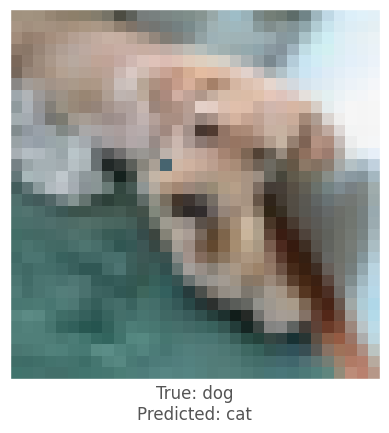


 lenet - image 1767 - 2 / 10


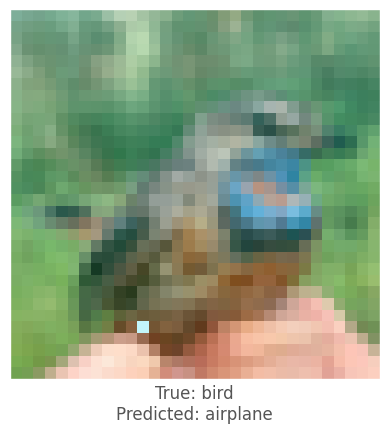


 lenet - image 8790 - 3 / 10


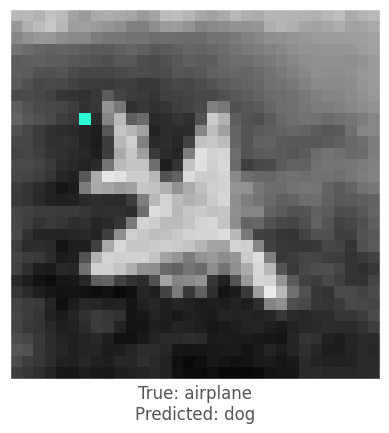


 lenet - image 4636 - 4 / 10


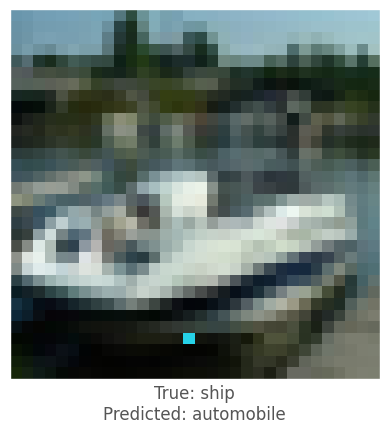


 lenet - image 3880 - 5 / 10


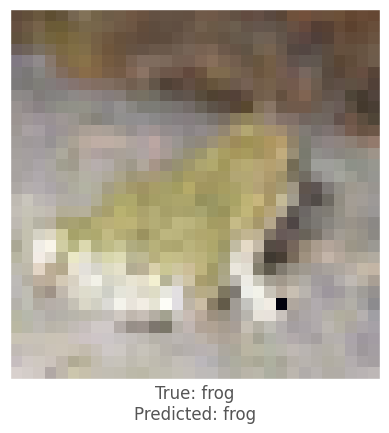


 lenet - image 9241 - 6 / 10


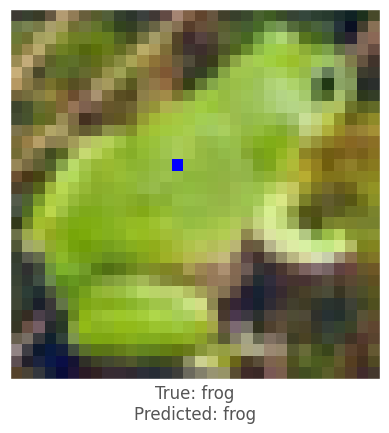


 lenet - image 2833 - 7 / 10


c:\Users\victo\onePixelAttack\differential_evolution.py:146: RuntimeWarning: divide by zero encountered in scalar divide
  convergence=self.tol / convergence) is True):


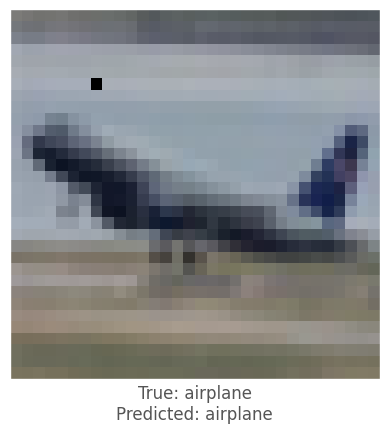


 lenet - image 9062 - 8 / 10


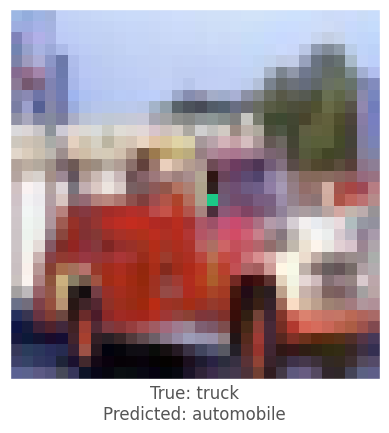


 lenet - image 5216 - 9 / 10


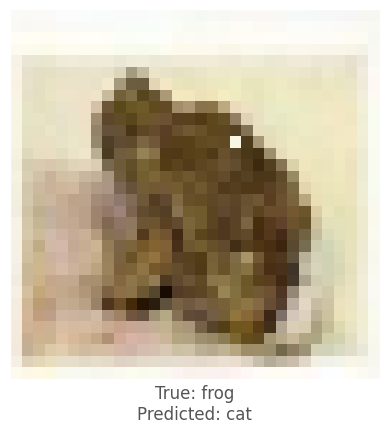


 lenet - image 3841 - 10 / 10


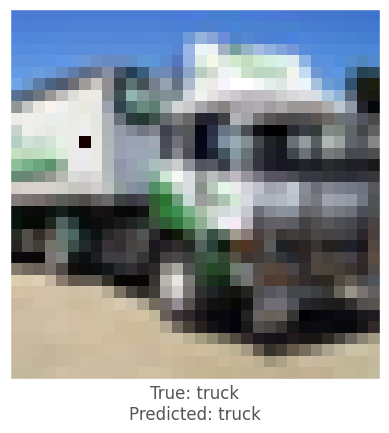

In [4]:
untargeted = attackHelper.attack_all(lenet,class_names,correct_imgs,x_test,y_test)

In [5]:
untargeted = helper.load_results()
columns = ['model', 'pixels', 'image', 'true', 'predicted', 'success', 'cdiff', 'prior_probs', 'predicted_probs', 'perturbation']
untargeted_results = pd.DataFrame(untargeted, columns=columns)

In [6]:
helper.attack_stats(untargeted_results, [lenet], network_stats)

[1]


,model,accuracy,pixels,attack_success_rate
0,lenet,0.7522,1,0.6
